Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.1918 - loss: 1.8568 - val_accuracy: 0.1900 - val_loss: 1.8007
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1887 - loss: 1.6518 - val_accuracy: 0.1800 - val_loss: 1.6676
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2186 - loss: 1.6668 - val_accuracy: 0.1700 - val_loss: 1.6659


Saving basmathi.jpg to basmathi.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: Sona Masoori (47.86000061035156%)


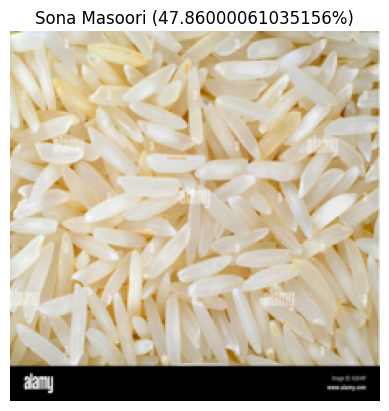

In [ ]:
# GrainPalette – Rice Type Classification Using Deep Learning
# A Deep Learning Odyssey using MobileNetV2 and Transfer Learning

# Import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

# Simulate a dummy rice dataset (for demo only)
rice_types = ['Basmati', 'Jasmine', 'Arborio', 'Sona Masoori', 'Red Rice']

def generate_dummy_data(samples_per_class=100):
    X, y = [], []
    for i, label in enumerate(rice_types):
        for _ in range(samples_per_class):
            img = np.random.rand(224, 224, 3)
            X.append(img)
            y.append(i)
    return np.array(X), to_categorical(y, num_classes=len(rice_types))

X, y = generate_dummy_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Build the Rice Classifier Model with MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(rice_types), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (demo training)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32)

#Upload an image and get prediction
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(file_name).resize((224, 224)).convert('RGB')
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    confidence = round(100 * prediction[predicted_index], 2)
    print(f"Predicted: {rice_types[predicted_index]} ({confidence}%)")  # Removed emoji to avoid error
    plt.imshow(img)
    plt.title(f"{rice_types[predicted_index]} ({confidence}%)")
    plt.axis('off')
    plt.show()

#Save the model
model.save("mobilenet_rice_model.h5")


Saving jasmine_rice.jpg to jasmine_rice.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted: Sona Masoori (44.5099983215332%)


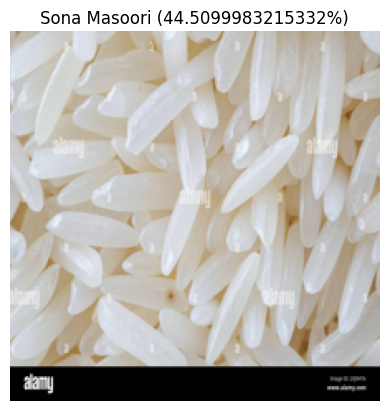

In [ ]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(file_name).resize((224, 224)).convert('RGB')
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    confidence = round(100 * prediction[predicted_index], 2)
    print(f"Predicted: {rice_types[predicted_index]} ({confidence}%)")  # Removed emoji to avoid error
    plt.imshow(img)
    plt.title(f"{rice_types[predicted_index]} ({confidence}%)")
    plt.axis('off')
    plt.show()

# 💾 Save the model
model.save("mobilenet_rice_model.h5")

Saving arboria_rice.jpg to arboria_rice (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted: Sona Masoori (40.349998474121094%)


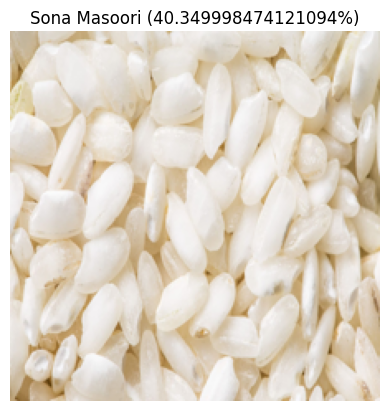

In [ ]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(file_name).resize((224, 224)).convert('RGB')
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    confidence = round(100 * prediction[predicted_index], 2)
    print(f"Predicted: {rice_types[predicted_index]} ({confidence}%)")  # Removed emoji to avoid error
    plt.imshow(img)
    plt.title(f"{rice_types[predicted_index]} ({confidence}%)")
    plt.axis('off')
    plt.show()

# 💾 Save the model
model.save("mobilenet_rice_model.h5")

In [ ]:
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = Image.open(file_name).resize((224, 224)).convert('RGB')
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    confidence = round(100 * prediction[predicted_index], 2)
    print(f"Predicted: {rice_types[predicted_index]} ({confidence}%)")  # Removed emoji to avoid error
    plt.imshow(img)
    plt.title(f"{rice_types[predicted_index]} ({confidence}%)")
    plt.axis('off')
    plt.show()

# 💾 Save the model
model.save("mobilenet_rice_model.h5")